# Airbnb Pricing Predictions
### Statistical Model Predicting Optimal Airbnb Listing Prices

1. Pricing strategy is the single greatest lever you have to improve profitability 
2. Proactively creating the conditions under which better and more-profitable pricing outcomes 
3. Understand the underlying pricing dynamics of the Airbnb market is very important both for hosts and guests.

## Introduction to Airbnb

Airbnb is founded in August of 2008 and based in San Francisco, California, Airbnb is a trusted community marketplace for people to list, discover, and book unique accommodations around the world — online or from a mobile phone or tablet. Whether a spare bedroom, an apartment, a villa or a private island, Airbnb connects travelers to a more diverse and authentic range of experiences in over 34,000 cities and 190 countries.

However, we seek to analyze over 75,000 listings in the Australia in order to better understand how the use of listing attributes such as bedrooms, location, ratings, and more can be used to accurately predict the optimal listing price both for the host and guest.

## Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
import time
import matplotlib.pyplot as plt
import matplotlib
import math
import seaborn as sns
import pylab
import scipy.stats as stats
%matplotlib inline 
plt.style.use('fivethirtyeight')

## 1. Load the datasets- Listing

In [2]:
# Read the listing datasets from all region in Australia
listing_BR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Barossa/listings.csv', low_memory=True)
listing_MB = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Melbourne/listings.csv', low_memory=True)
listing_NR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/NorthernRivers/listings.csv', low_memory=True)
listing_SN = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Sydney/listings.csv', low_memory=True)
listing_TM = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Tasmania/listings.csv', low_memory=True)
listing_WA = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/WesternAustralia/listings.csv', low_memory=True)

D:\Users\ivans\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Users\ivans\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Users\ivans\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Describing and concatenate the datasets- Listing

In [3]:
# Read the shape of the listing datasets
print(listing_BR.shape)
print(listing_MB.shape)
print(listing_NR.shape)
print(listing_SN.shape)
print(listing_TM.shape)
print(listing_WA.shape)

(195, 96)
(21253, 96)
(5064, 96)
(33481, 96)
(4783, 96)
(11332, 96)


In [4]:
if (listing_BR.columns != listing_MB.columns).sum() ==0:
    print ('There is no difference in columns between Barossa and Melbourne') 
else:
    print ('The difference in columns between Barossa and Melbourne is {}'.format((listing_BR.columns != listing_MB.columns).sum()))

if (listing_BR.columns != listing_NR.columns).sum() ==0:
    print ('There is no difference in columns between Barossa and Northern Rivers') 
else:
    print ('The difference in columns between Barossa and Northern Rivers is {}'.format((listing_BR.columns != listing_NR.columns).sum()))

if (listing_BR.columns != listing_SN.columns).sum() ==0:
    print ('There is no difference in columns between Barossa and Sydney')
else:
    print ('The difference in columns between Barossa and Sydney is {}'.format((listing_BR.columns != listing_SN.columns).sum()))

if (listing_BR.columns != listing_TM.columns).sum() ==0:
    print ('There is no difference in columns between Barossa and Tasmania') 
else:
    print ('The difference in columns between Barossa and Tasmania is {}'.format((listing_BR.columns != listing_TM.columns).sum()))

if (listing_BR.columns != listing_WA.columns).sum() ==0:
    print ('There is no difference in columns between Barossa and Western Australia') 
else:
    print ('The difference in columns between Barossa and Western Australia is {}'.format((listing_BR.columns != listing_WA.columns).sum()))
    

There is no difference in columns between Barossa and Melbourne
There is no difference in columns between Barossa and Northern Rivers
There is no difference in columns between Barossa and Sydney
There is no difference in columns between Barossa and Tasmania
There is no difference in columns between Barossa and Western Australia


We could see all the columns among dataset are the same. Hence, we can concatenate the listing datasets by columns.

In [5]:
# [(i, j) for i in listing_BR.columns for j in listing_MB.columns]
# if i == j:
#     difference=[]
#     difference.append(i)
#     print(difference)

In [6]:
# combining the listing datasets from all region in Australia as my main dataset
frames_listing= [listing_BR, listing_MB, listing_NR, listing_SN, listing_TM, listing_WA]
df_listing= pd.concat(frames_listing)
df_listing.reset_index()
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1125097,https://www.airbnb.com/rooms/1125097,20180521033740,2018-05-21,Strathlyn Coach House Barossa,Please note there is a minimum stay of 2 night...,Strathlyn Coach House is an independent buildi...,Please note there is a minimum stay of 2 night...,none,Strathlyn Estate is a very private property su...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.31
1,1133195,https://www.airbnb.com/rooms/1133195,20180521033740,2018-05-21,Strathlyn Lemon Tree Spa Barossa,Enjoy the charms of the Barossa Valley in this...,The Strathlyn Lemon Tree Spa Apartment is a se...,Enjoy the charms of the Barossa Valley in this...,none,Enjoy the tranquility of staying on the beauti...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.38
2,1133236,https://www.airbnb.com/rooms/1133236,20180521033740,2018-05-21,Strathlyn Spa Garden Suites Barossa,The spa garden suites are located on the easte...,Strathlyn Residence was constructed in 1905 fr...,The spa garden suites are located on the easte...,none,Strathlyn Estate is a very private property su...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.32
3,1710462,https://www.airbnb.com/rooms/1710462,20180521033740,2018-05-21,Shea-Oak Log Studio Shed,Our converted shed is a cozy and comfortable o...,"The Shea-Oak Log Studio AKA The Shed, is a lov...",Our converted shed is a cozy and comfortable o...,none,The Studio is located in a very unique area. T...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,4.71
4,1787389,https://www.airbnb.com/rooms/1787389,20180521033740,2018-05-21,Barossa Valley Apartment 1 walk to restaurants,"Luxury apartment 2 bedrooms, 2 bathrooms, full...",Our luxury apartments are locate in a fantasti...,"Luxury apartment 2 bedrooms, 2 bathrooms, full...",none,Barossa Valley is a beautiful community of peo...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,28,0.41


In [7]:
# print the shape of the main dataset
print ('Number of rows:', df_listing.shape[0])
print ('Number of columns:', df_listing.shape[1])
print ('------------------------------------\n')

# get the number of the unique value of all columns
print ('Number of unique values')
for items in df_listing:
    print (items, df_listing[items].nunique())
print ('------------------------------------\n')

print ('Number of missing values')
print (df_listing.isnull().sum()[df_listing.isnull().sum()>0])

('Number of rows:', 76108)
('Number of columns:', 96)
------------------------------------

Number of unique values
('id', 76108)
('listing_url', 76108)
('scrape_id', 6)
('last_scraped', 12)
('name', 74269)
('summary', 71601)
('space', 51964)
('description', 74049)
('experiences_offered', 1)
('neighborhood_overview', 41196)
('notes', 30424)
('transit', 42057)
('access', 41968)
('interaction', 38082)
('house_rules', 40883)
('thumbnail_url', 0)
('medium_url', 0)
('picture_url', 75837)
('xl_picture_url', 0)
('host_id', 53671)
('host_url', 53671)
('host_name', 13642)
('host_since', 2965)
('host_location', 3362)
('host_about', 27617)
('host_response_time', 4)
('host_response_rate', 64)
('host_acceptance_rate', 0)
('host_is_superhost', 2)
('host_thumbnail_url', 53432)
('host_picture_url', 53432)
('host_neighbourhood', 310)
('host_listings_count', 91)
('host_total_listings_count', 91)
('host_verifications', 472)
('host_has_profile_pic', 2)
('host_identity_verified', 2)
('street', 3092)
('neig

## 3. Removed Columns

### Non-features
Dropping columns/features with 0 or only 1 variable which is not helpful for predicting price
- experiences_offered 
- thumbnail_url
- medium_url 
- xl_picture_url
- host_acceptance_rate
- neighbourhood_group_cleansed
- country_code
- country
- has_availability 
- requires_license
- is_business_travel_ready

In [8]:
df_listing.drop(['experiences_offered', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'country_code', 'country', 'has_availability', 'requires_license', 'is_business_travel_ready'], inplace=True, axis= 1)

## Summary Datasets

## 1. Load the datasets- Summary

In [9]:
# Read the summary datasets
listing1_BR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Barossa/listings(1).csv')
listing1_MB = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Melbourne/listings(1).csv')
listing1_NR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/NorthernRivers/listings(1).csv')
listing1_SN = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Sydney/listings(1).csv')
listing1_TM = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Tasmania/listings(1).csv')
listing1_WA = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/WesternAustralia/listings(1).csv')

## 2. Describing and concatenate the datasets- Summary

In [10]:
# Read the shape of the summary datasets
print(listing1_BR.shape)
print(listing1_MB.shape)
print(listing1_NR.shape)
print(listing1_SN.shape)
print(listing1_TM.shape)
print(listing1_WA.shape)

(195, 16)
(21253, 16)
(5064, 16)
(33481, 16)
(4783, 16)
(11332, 16)


In [11]:
# Combining the summary datasets
frames_listing1= [listing1_BR, listing1_MB, listing1_NR, listing1_SN, listing1_TM, listing1_WA]
df_listing1= pd.concat(frames_listing1)
df_listing1.reset_index()
df_listing1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1125097,Strathlyn Coach House Barossa,6172214,Heather,NaN,Angaston,-34.493886,139.029424,Entire home/apt,250,2,75,2018-05-20,1.31,3,342
1,1133195,Strathlyn Lemon Tree Spa Barossa,6172214,Heather,NaN,Penrice,-34.494032,139.032022,Entire home/apt,230,2,17,2018-04-02,0.38,3,342
2,1133236,Strathlyn Spa Garden Suites Barossa,6172214,Heather,NaN,Penrice,-34.493557,139.032210,Private room,260,1,17,2018-04-22,0.32,3,357
3,1710462,Shea-Oak Log Studio Shed,6645956,Kylie And Tom,NaN,Shea-Oak Log,-34.509717,138.816127,Entire home/apt,91,1,261,2018-05-13,4.71,1,352
4,1787389,Barossa Valley Apartment 1 walk to restaurants,9380091,Kym,NaN,Tanunda,-34.528354,138.953643,Entire home/apt,350,1,12,2017-10-10,0.41,28,332


In [12]:
#see the shape of summary datasets
print (df_listing1.shape)

#get the number of the unique value of all columns
for items in df_listing1:
    print (items, df_listing1[items].nunique())

(76108, 16)
('id', 76108)
('name', 74269)
('host_id', 53671)
('host_name', 13642)
('neighbourhood_group', 0)
('neighbourhood', 241)
('latitude', 76108)
('longitude', 76108)
('room_type', 3)
('price', 968)
('minimum_nights', 84)
('number_of_reviews', 343)
('last_review', 1386)
('reviews_per_month', 1018)
('calculated_host_listings_count', 65)
('availability_365', 366)


## 3. Removed Columns- summary

### Repeated features

- name
- host_id
- host_name
- neighbourhood_group
- latitude
- longitude
- room_type
- price
- minimum_nights
- number_of_reviews
- last_review
- reviews_per_month
- calculated_host_listings_count
- availability_365

In [13]:
#drop the repeated columns
df_listing1 = df_listing1[['id','neighbourhood']]
#rename the columns
df_listing1.rename(columns={'neighbourhood':'areas'})

,id,areas
0,1125097,Angaston
1,1133195,Penrice
2,1133236,Penrice
3,1710462,Shea-Oak Log
4,1787389,Tanunda
5,2327616,Gawler River
6,2567051,Cockatoo Valley
7,2891547,Tanunda
8,3948179,Marananga
9,4010692,Angaston


## 2. Describing and concatenate the datasets- Merge dataset (listings and summaries)

## Merge the listing dataset with the summary datatset

In [14]:
# Merge the listing dataset with the summary datatset
df_listing3=pd.merge(df_listing, df_listing1, on='id')

In [15]:
# checked the merged dataset
df_listing3.shape

(76108, 86)

In [16]:
# see the check the shape of the round 2 of columns dropping
print (df_listing3.shape)

#check the number of unique value of the datasets, de_listing3
for items in df_listing3:
    print (items, df_listing3[items].nunique())

(76108, 86)
('id', 76108)
('listing_url', 76108)
('scrape_id', 6)
('last_scraped', 12)
('name', 74269)
('summary', 71601)
('space', 51964)
('description', 74049)
('neighborhood_overview', 41196)
('notes', 30424)
('transit', 42057)
('access', 41968)
('interaction', 38082)
('house_rules', 40883)
('picture_url', 75837)
('host_id', 53671)
('host_url', 53671)
('host_name', 13642)
('host_since', 2965)
('host_location', 3362)
('host_about', 27617)
('host_response_time', 4)
('host_response_rate', 64)
('host_is_superhost', 2)
('host_thumbnail_url', 53432)
('host_picture_url', 53432)
('host_neighbourhood', 310)
('host_listings_count', 91)
('host_total_listings_count', 91)
('host_verifications', 472)
('host_has_profile_pic', 2)
('host_identity_verified', 2)
('street', 3092)
('neighbourhood_x', 229)
('neighbourhood_cleansed', 241)
('city', 2846)
('state', 60)
('zipcode', 1472)
('market', 37)
('smart_location', 2850)
('latitude', 76108)
('longitude', 76108)
('is_location_exact', 2)
('property_type'

In [17]:
#covert all null to 'None'
df_listing3.fillna('None', inplace=True)

## 3. Removed Columns- Merge dataset(listings and summaries)¶


### Indexing and referring features
The indexing features do not possess predictive power
- id
- host_id

### Secondary features
- scrape_id
- name- the name might attract certain people, however, it is difficult to conclude that the name has certain level of predictive power
- listing_url
- last_scraped
- picture_url
- guests_included
- extra_people 
- host_url 
- host_name- there may certainly be some predictive power when considering gender / ethnicity of the name; however, we chose not to incorporate host_name for various ethical reasons as well as difficulty in discerning gender neutral names let alone ethnicity from a name
- host_thumbnail_url
- host_picture_url 
- host_listings_count
- host_total_listings_count
- host_verifications
- license
- jurisdiction_names- too many null


### Date features
The date in these dataset are merely when the hosts' information were updated the and travellers make the review, hence not predictive feature.
- calendar_updated
- calendar_last_scraped
- host_since
- first_review
- last_review

### Location features
Due to unstandardized address recorded (eg. Upper and lower case, space or without space, abbreviation etc), these location features are better explained by zipcode and longitude and latitude as these mentioned features are more standarized and provide more exact location than the text feature.
- host_location
- host_neighbourhood- more than 50% of null values
- street
- market
- smart_location
- neighbourhood_y 
- neighbourhood_x
- neighbourhood_cleansed 
- city
- state


### Text features
These features are seperated from pricing analysis and will be analyzed by using NLP.
- summary
- description
- neighborhood_overview
- notes
- house_rules
- host_about
- transit
- access
- amenities
- interaction
- space
 
### Availability features
These features are better explained by minimum night and maximum night.
- availability_30 
- availability_60 
- availability_90
- availability_365

### Facilities features
- square_feet- 95% variable is null values. 

### Price features
Price is our dependent variable (y), weekly and monthly removed since we are focusing on single day listings. Further, security deposit and cleaning fee are affected by price, hence removed. 
- weekly_price 
- monthly_price 
- security_deposit 
- cleaning_fee

## 3. Selected Columns- Merge dataset (listings and summaries)


### Host information features
- host_is_superhost- Superhost usually have more pricing options and enjoy other exlusive benefit (Airbnb 2018)
- host_identity_verified- Traveller might willing to pay higher premiums if identity_verified, safety concern.

### Location features
The locations of the accomodations are one of critical factors in setting the prices. Eg. Accommodations in CBD areas might have higher rental price than those outskirt areas.
- zipcode
- latitude 
- longitude 
- is_location_exact

### Facilities features
The facilities of the accomodations are one of critical factors in setting the prices. Eg. Entire apartment usually have higher price than single room.
- property_type 
- room_type 
- accommodates 
- bathrooms 
- bedrooms 
- beds 
- bed_type

### Dependent variable (y)
Rental price is what we want to analyze and optimize.
- price 

### Availability features
Travellers might have different needs or preference. eg. The travellers with urgent need of the accomodations are more willing to pay higher premiums.
- minimum_nights
- maximum_nights 
- instant_bookable
- cancellation_policy

### Scores features
Both demand and prices are significantly affected by ratings, especially in more recent years (Lewis and Zervas, 2016)

According to the study, when ratings rose by one star, demand increased by 25 percent, which then led to a 9 percent increase in prices. (Review Trackers, 2016)

- number_of_reviews
- review_scores_rating
- review_scores_accuracy 
- review_scores_cleanliness 
- review_scores_checkin 
- review_scores_communication 
- review_scores_location
- reviews_per_month 
- host_response_time 
- host_response_rate


### Guest information features
Less requirement from travellers might lead to higher prices 
- require_guest_profile_picture 
- require_guest_phone_verification  


In [18]:
# Round 2: drop the similiar and repeated columns or more than 50% of the variables are "None" within columns
df_listing3.drop(['id', 'host_id', 'scrape_id', 'host_location', 'host_neighbourhood', 'host_listings_count', 'street', 'market', 'smart_location', 'calendar_updated', 'host_since', 'listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_url', 'host_name','host_about','host_thumbnail_url', 'host_picture_url', 'host_total_listings_count', 'host_verifications', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'jurisdiction_names', 'neighbourhood_cleansed', 'neighbourhood_y', 'city', 'state', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'neighbourhood_y', 'neighbourhood_x', 'calculated_host_listings_count','availability_30', 'availability_60', 'availability_90', 'availability_365', 'reviews_per_month', 'square_feet'], inplace=True, axis= 1)


## 4. Cleaning the datasets

## Coverting the objects to numerics

In [19]:
import re

### Host response time

In [20]:
# use the dictionary for the replacement the qualitive scalar to quantitative scalar
df_listing3 = df_listing3.replace({"host_response_time" : {"a few days or more" : 1, "within a day" : 2, "within a few hours" : 3, "within an hour" : 4}})

In [21]:
#Covert the objects to numerics and None to the means of the non-null variables
def convert_numerics(object):
    numerics = object
    without_none = numerics
    without_none = without_none[without_none != 'None']
    without_none = without_none.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : without_none.mean() if x == 'None' else x)
    numerics= numerics.apply(lambda x : int(x))
    return numerics

In [22]:
df_listing3.host_response_time= convert_numerics(df_listing3.host_response_time)

### Host response rate

In [23]:
#Covert the objects to numerics and None to the means of the non-null variables
def convert_numerics_1(object):
    numerics= object.apply(lambda x : re.sub('[^A-Za-z0-9]+', '', x))
    without_none = numerics
    without_none = without_none[without_none != 'None']
    without_none = without_none.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : without_none.mean() if x == 'None' else x)
    numerics= numerics.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : round((x/100), 2))
    return numerics

In [24]:
df_listing3.host_response_rate= convert_numerics_1(df_listing3.host_response_rate)

### Price

In [25]:
#Covert the objects to numerics and None to the means of the non-null variables
def convert_numerics_2(object):
    numerics= object.apply(lambda x : re.sub('[^A-Za-z0-9]+', '', x))
    without_none = numerics
    without_none = without_none[without_none != 'None']
    without_none = without_none.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : without_none.mean() if x == 'None' else x)
    numerics= numerics.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : round((x/100), 2))
    return numerics

In [26]:
df_listing3.price=convert_numerics_2(df_listing3.price)

In [27]:
#Covert the objects to numerics and None to the means of the non-null variables
def convert_numerics_3(object):
    numerics= object
    without_none = numerics
    without_none = without_none[without_none != 'None']
    without_none = without_none.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : without_none.mean() if x == 'None' else x)
    numerics= numerics.apply(lambda x : int(x))
    return numerics


### Bathrooms

In [28]:
df_listing3.bathrooms=convert_numerics_3(df_listing3.bathrooms)

### Bedrooms

In [29]:
df_listing3.bedrooms=convert_numerics_3(df_listing3.bedrooms)

### Beds

In [30]:
df_listing3.beds=convert_numerics_3(df_listing3.beds)

### Host is superhost

In [31]:
# Convert null value to not superhost, usually super host will show their status
df_listing3.host_is_superhost = df_listing3.host_is_superhost.apply(lambda x : 'f' if x == 'None' else x)

### Review Score

In [32]:
#Super host
def convert_numerics_4(object1, object2):
    numerics= object1
    without_none = numerics
    without_none = without_none[without_none != 'None']
    without_none = without_none.apply(lambda x : float(x))
    without_none_superhost = without_none[object2=='t']
    numerics_superhost = numerics
    without_none_superhost_mean = without_none_superhost.mean()
    for i in range(len(numerics)):
        if (object2.iloc[i] == 't') & (numerics[i] =='None'):
            numerics_superhost[i] = without_none_superhost_mean
    return numerics_superhost

#Normal host
def convert_numerics_5(object1, object2):
    numerics= object1
    without_none = numerics
    without_none = without_none[without_none != 'None']
    without_none = without_none.apply(lambda x : float(x))
    without_none_normalhost = without_none[object2=='f']
    numerics_normalhost = numerics
    without_none_normalhost_mean = without_none_normalhost.mean()
    for i in range(len(numerics)):
        if (object2.iloc[i] == 'f') & (numerics[i] =='None'):
            numerics_normalhost[i] = without_none_normalhost_mean
    return numerics_normalhost

#Convert scores to integer
def convert_numerics_6(numerics):
    numerics = numerics.apply(lambda x : int(x))
    return numerics


### Review scores rating

In [33]:
df_listing3.review_scores_rating = convert_numerics_4(df_listing3.review_scores_rating, df_listing3.host_is_superhost)
df_listing3.review_scores_rating = convert_numerics_5(df_listing3.review_scores_rating, df_listing3.host_is_superhost)
df_listing3.review_scores_rating = convert_numerics_6(df_listing3.review_scores_rating)

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Review scores accuracy

In [34]:
df_listing3.review_scores_accuracy = convert_numerics_4(df_listing3.review_scores_accuracy, df_listing3.host_is_superhost)
df_listing3.review_scores_accuracy = convert_numerics_5(df_listing3.review_scores_accuracy, df_listing3.host_is_superhost)
df_listing3.review_scores_accuracy = convert_numerics_6(df_listing3.review_scores_accuracy)

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Review Scores Cleanliness

In [35]:
df_listing3.review_scores_cleanliness = convert_numerics_4(df_listing3.review_scores_cleanliness, df_listing3.host_is_superhost)
df_listing3.review_scores_cleanliness = convert_numerics_5(df_listing3.review_scores_cleanliness, df_listing3.host_is_superhost)
df_listing3.review_scores_cleanliness = convert_numerics_6(df_listing3.review_scores_cleanliness)

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Review Scores Checkin

In [36]:
df_listing3.review_scores_checkin = convert_numerics_4(df_listing3.review_scores_checkin, df_listing3.host_is_superhost)
df_listing3.review_scores_checkin = convert_numerics_5(df_listing3.review_scores_checkin, df_listing3.host_is_superhost)
df_listing3.review_scores_checkin = convert_numerics_6(df_listing3.review_scores_checkin)

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Review Scores Communication

In [37]:
df_listing3.review_scores_communication = convert_numerics_4(df_listing3.review_scores_communication, df_listing3.host_is_superhost)
df_listing3.review_scores_communication = convert_numerics_5(df_listing3.review_scores_communication, df_listing3.host_is_superhost)
df_listing3.review_scores_communication = convert_numerics_6(df_listing3.review_scores_communication)

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Review Scores Location

In [38]:
df_listing3.review_scores_location = convert_numerics_4(df_listing3.review_scores_location, df_listing3.host_is_superhost)
df_listing3.review_scores_location = convert_numerics_5(df_listing3.review_scores_location, df_listing3.host_is_superhost)
df_listing3.review_scores_location = convert_numerics_6(df_listing3.review_scores_location)

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Review Scores Value

In [39]:
df_listing3.review_scores_value = convert_numerics_4(df_listing3.review_scores_value, df_listing3.host_is_superhost)
df_listing3.review_scores_value = convert_numerics_5(df_listing3.review_scores_value, df_listing3.host_is_superhost)
df_listing3.review_scores_value = convert_numerics_6(df_listing3.review_scores_value)

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Zipcode

In [40]:
#Covert the objects to numerics and None to 0
def convert_numerics_7(object):
    numerics= object
    numerics = numerics.map(lambda x : str(x).replace('None','0'))
    numerics= numerics.map(lambda x : re.sub("[^0-9]", "", str(x)))
    numerics= numerics.map(lambda x : x[0:4])
    numerics= pd.to_numeric(numerics, errors='coerce')
    numerics= numerics.fillna(0)
    numerics= numerics.map(lambda x : int(x))
    return numerics


In [41]:
df_listing3.zipcode=convert_numerics_7(df_listing3.zipcode)

In [42]:
# Find the number of Null value in zipcode
print ("Number of Null value in zipcode:", (df_listing3.zipcode == 0).sum())

('Number of Null value in zipcode:', 309)


In [43]:
# Drop the row where Null value Zipcode 
df_listing3.drop(df_listing3[df_listing3.zipcode == 0].index, inplace=True)
df_listing3.reset_index

<bound method DataFrame.reset_index of        host_response_time  host_response_rate host_is_superhost  \
0                       3                1.00                 t   
1                       3                1.00                 t   
2                       3                1.00                 t   
3                       4                1.00                 f   
4                       4                1.00                 f   
5                       4                1.00                 t   
6                       2                0.50                 f   
7                       3                1.00                 t   
8                       4                1.00                 f   
9                       3                0.95                 f   
10                      4                1.00                 f   
11                      3                1.00                 t   
12                      2                0.50                 f   
13                     

## 5. Split the dataset to objects and numeric dataset

In [44]:
df_listing3obj = df_listing3.select_dtypes('O')
df_listing3num = df_listing3.select_dtypes(include=np.number)

## 6. Describing Summary Statistics for numeric dataset

In [45]:
print "Number of columns in numeric dataset:", len(df_listing3num.columns)
df_listing3num.describe()

Number of columns in numeric dataset: 20


,host_response_time,host_response_rate,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,7.579900e+04,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000,75799.000000
mean,3.341231,0.950915,3331.004446,-34.874831,144.094202,3.691091,1.304991,1.696592,2.245874,179.908205,3.490257,1.524356e+04,16.812478,93.934142,9.454360,9.304278,9.564401,9.564163,9.496642,9.322234
std,0.699642,0.133248,1707.037550,3.317148,12.137535,2.417361,0.650026,1.221494,1.925047,250.929688,14.497953,3.650299e+06,33.173900,7.271933,0.767178,0.904210,0.689617,0.699007,0.657469,0.800525
min,1.000000,0.000000,2000.000000,-43.442554,113.527380,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,0.950000,2042.000000,-37.809536,144.963535,2.000000,1.000000,1.000000,1.000000,78.000000,1.000000,3.000000e+01,1.000000,93.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,3.000000,1.000000,2558.000000,-33.892811,150.930641,3.000000,1.000000,1.000000,2.000000,125.000000,2.000000,1.125000e+03,4.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
75%,4.000000,1.000000,3185.000000,-33.786060,151.232774,5.000000,1.000000,2.000000,3.000000,200.000000,3.000000,1.125000e+03,17.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.000000,1.000000,8720.000000,-15.512408,153.637837,70.000000,40.000000,50.000000,50.000000,15001.000000,1120.000000,1.000000e+09,545.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 6. Get dummies variables of the objects dataset

In [46]:
dummies = pd.get_dummies(df_listing3obj)

## 7. Merge the objects dataset and numeric dataset to final dataset

In [47]:
df_listing_final = df_listing3num.merge(dummies, left_index = True, right_index = True,how = 'outer')#merge back

In [48]:
#See the shape and data types of the final dataset
print 'Number of rows:', df_listing_final.shape[0]
print 'Number of columns:', df_listing_final.shape[1]
print '------------------------------------\n'

print "Data Types"
print df_listing_final.dtypes

Number of rows: 75799
Number of columns: 93
------------------------------------

Data Types
host_response_time                                   int64
host_response_rate                                 float64
zipcode                                              int64
latitude                                           float64
longitude                                          float64
accommodates                                         int64
bathrooms                                            int64
bedrooms                                             int64
beds                                                 int64
price                                              float64
minimum_nights                                       int64
maximum_nights                                       int64
number_of_reviews                                    int64
review_scores_rating                                 int64
review_scores_accuracy                               int64
review_scores_cleanlin

## Price (Target variables)

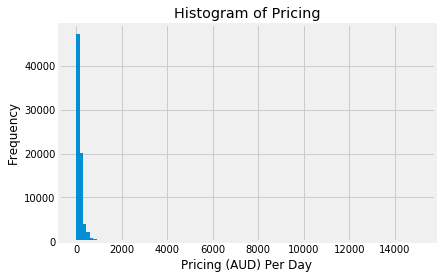

100.0    2488
120.0    2255
150.0    2075
50.0     1935
250.0    1800
200.0    1799
70.0     1720
80.0     1476
90.0     1325
65.0     1296
Name: price, dtype: int64

In [49]:
plt.hist(df_listing_final['price'], bins=100)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (AUD) Per Day")
plt.ylabel("Frequency")
plt.show()


df_listing_final['price'].value_counts().head(10)

We see the distribution for pricing is highly right skewed. This again makes sense as a majority of the listings on Airbnb are single individual listings. Additionally, Airbnb does strongly cater to travelers who are looking for cheaper places to stay for short durations of time. There are of course listings with a high pricing as well; intuitively this matches with hosts that are listing a high value property such as castles.

However, our target would be price below AUD 200 because majority of traveller see Airbnb as affordable, convenient housing options and 70% of traveller prefer to stay in an entire home (SSTH Blog Survey, 2016). With the price below AUD 200, you could get very good deal.

In [50]:
df_listing_final=df_listing_final.drop(df_listing_final[df_listing_final['price'] > 200].index, axis=0)
df_listing_final=df_listing_final.reset_index(drop=True)

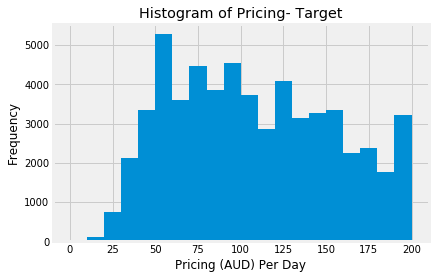

100.0    2488
120.0    2255
150.0    2075
50.0     1935
200.0    1799
70.0     1720
80.0     1476
90.0     1325
65.0     1296
130.0    1237
Name: price, dtype: int64

In [51]:
plt.hist(df_listing_final['price'], bins=20)
plt.title("Histogram of Pricing- Target")
plt.xlabel("Pricing (AUD) Per Day")
plt.ylabel("Frequency")
plt.show()


df_listing_final['price'].value_counts().head(10)

We could see the the distribution for targeted price is left skewed.

## Host response time and rate

In [52]:
print 'Correlationship of host_response_rate and host_response_time'
print df_listing_final.host_response_rate[df_listing_final['host_response_time']>0].corr(df_listing_final.host_response_time[df_listing_final['host_response_time']>0])

Correlationship of host_response_rate and host_response_time
0.5721303975743864


Frequency of host_response
4    27513
3    25410
2     4269
1      948
Name: host_response_time, dtype: int64


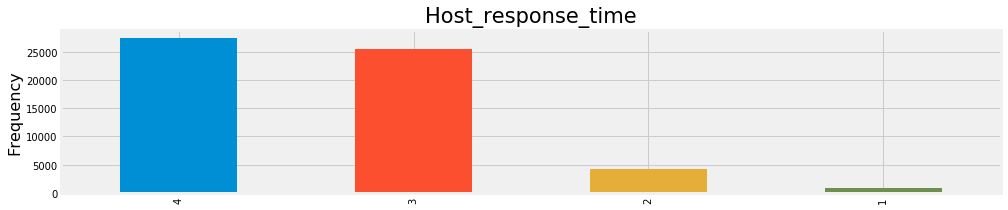

In [53]:
ax = df_listing_final.host_response_time[df_listing_final['host_response_time']>0].value_counts().plot(kind='bar', figsize=(15,3))

# set the title
ax.set_title("Host_response_time", fontsize=21, y=1.01)


# y-axis labels
ax.set_ylabel('Frequency', fontsize=16)

ax.set



# explore distribution of accommodates
print 'Frequency of host_response'
print df_listing_final.host_response_time[df_listing_final['host_response_time']>0].value_counts()

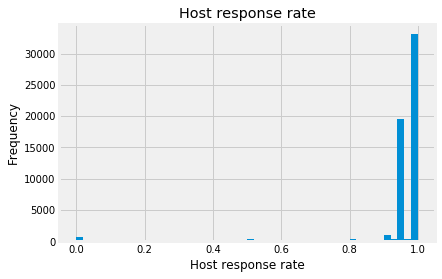

Frequency of host response rate
1.00    32568
0.95    19591
0.90      877
0.00      683
0.80      414
0.50      412
0.98      270
0.99      252
0.67      251
0.96      246
0.75      209
0.97      201
0.92      180
0.70      173
0.83      164
0.91      154
0.78      152
0.86      145
0.88      134
0.76      120
0.89      107
0.60      105
0.33       95
0.93       94
0.94       88
0.71       60
0.40       47
0.25       36
0.84       31
0.68       27
        ...  
0.20       19
0.63       18
0.79       17
0.06       17
0.57       15
0.58       15
0.43       15
0.61       14
0.73       13
0.81       10
0.72        9
0.85        9
0.77        7
0.87        7
0.30        6
0.17        6
0.56        6
0.65        6
0.55        3
0.38        3
0.14        3
0.44        2
0.32        2
0.62        2
0.13        2
0.29        2
0.42        2
0.11        1
0.59        1
0.22        1
Name: host_response_rate, Length: 61, dtype: int64


In [54]:
plt.hist(df_listing_final.host_response_rate[df_listing_final['host_response_time']>0], bins=50)

plt.title("Host response rate")
plt.xlabel("Host response rate")
plt.ylabel("Frequency")
plt.show()

# explore distribution of accommodates
print 'Frequency of host response rate'
print df_listing_final.host_response_rate[df_listing_final['host_response_time']>0].value_counts()

We see that a majority of host response within one hours and response rate from 0.95 to 1.00. The are host response time and response rate are positive corelated.

## Accomodates, bedrooms and beds

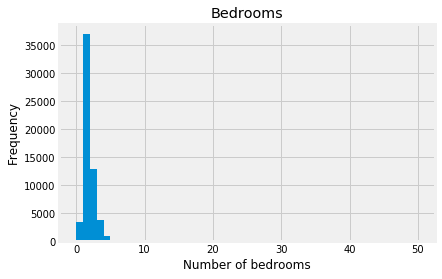

Number of bedrooms
1     36971
2     12829
3      3714
0      3493
4       930
5       131
6        30
10       12
7         8
50        7
8         6
12        3
16        1
9         1
13        1
14        1
46        1
15        1
Name: bedrooms, dtype: int64


In [55]:
plt.hist(df_listing_final['bedrooms'], bins=50)
plt.title("Bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Frequency")
plt.show()

# explore distribution of accommodates
print 'Number of bedrooms'
print df_listing_final.bedrooms.value_counts()

In [56]:
print "The precentage of listings that owned 1-10 rooms:", str(round(float((df_listing_final['bedrooms']>10).sum()+(df_listing_final['bedrooms']!=0).sum())/(df_listing_final.shape[0])*100, 2))+"%"

The precentage of listings that owned 1-10 rooms: 94.02%


In [57]:
print "Number of accomodation per bedroom"
df_bedroom = df_listing_final.loc[(df_listing_final['bedrooms']>10)|(df_listing_final['bedrooms']==0)]
df_bedroom.groupby(['bedrooms','accommodates']).count()[['beds']]

Number of accomodation per bedroom


beds
bedrooms accommodates      
0        1              265
         2             2363
         3              356
         4              411
         5               41
         6               33
         7                1
         8                4
         10               4
         16              15
12       12               1
         16               2
13       16               1
14       16               1
15       16               1
16       16               1
46       1                1
50       4                1
         16               6

It does not make sense if the travelers could rent more than 10 bedrooms with a price below AUD200 or accommodate travelers without a single bedroom. The possible explanation is the hosts listed all the bedrooms that they owed in single listing, however, the bedrooms are seperately rent out. The listing with no bedroom might referring to studio or errors. Further, these outliers represent only 6% of the population. Hence, these listing should be excluded from the analysis. 

In [58]:
df_listing_final.drop(df_listing_final[(df_listing_final['bedrooms']>10)].index | df_listing_final[(df_listing_final['bedrooms']==0)].index, inplace=True, axis=0)


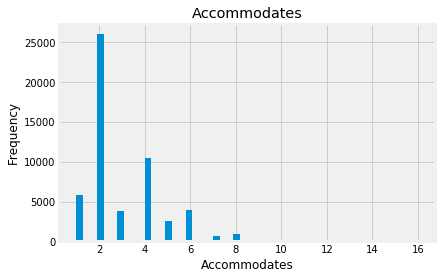

Number of accommodates
2     26028
4     10487
1      5791
6      3921
3      3807
5      2499
8       890
7       608
10      200
9       176
12       85
16       47
11       43
14       21
13       18
15       11
Name: accommodates, dtype: int64


In [59]:
plt.hist(df_listing_final['accommodates'], bins=(50))
plt.title("Accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Frequency")
plt.show()

# explore distribution of accommodates
print 'Number of accommodates'
print df_listing_final.accommodates.value_counts()

In [60]:
print 'Correlationship of accommodation and bedrooms'
print df_listing_final.accommodates.corr(df_listing_final.bedrooms)

Correlationship of accommodation and bedrooms
0.7922875008342803


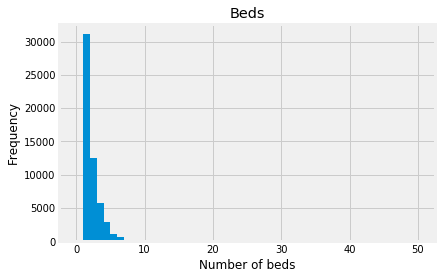

Number of beds
1     35775
2     16584
3      9382
4      6349
5      3349
6      1997
7       826
8       645
0       232
9       201
10      198
11       71
12       70
16       39
50       24
14       22
13       15
15       10
17        3
18        3
29        1
19        1
20        1
21        1
Name: beds, dtype: int64


In [61]:
plt.hist(df_listing_final['beds'], bins=50)
plt.title("Beds")
plt.xlabel("Number of beds")
plt.ylabel("Frequency")
plt.show()

# explore distribution of accommodates
print 'Number of beds'
print df_listing3.beds.value_counts()

In [62]:
print 'Correlationship of accommodation and beds'
print df_listing_final.accommodates.corr(df_listing_final.beds)

Correlationship of accommodation and beds
0.8220800832244604


In [63]:
print 'Correlationship of bedrooms and beds'
print df_listing_final.bedrooms.corr(df_listing_final.beds)

Correlationship of bedrooms and beds
0.7293924322269504


We see that a majority of listings have accommodations for 1-4 people. 1 bedroom with 1 bed typically accommodates 2 individuals. Furthermore, majority of accommodation have 1 bathrooms, it is reasonable to conclude that 1 bathroom can accommodate 1 to 4 people.

## Property type

### From the bar graph, we could see the highest average price go to Castle type and followed by Boat. The lowest average price go to Vacation home, followed by Dormitory.

Number of property type
Apartment            35885
House                25026
Townhouse             3534
Guest suite           1348
Guesthouse            1331
Bed and breakfast     1318
Villa                 1079
Condominium           1070
Cottage                724
Bungalow               695
Name: property_type, dtype: int64


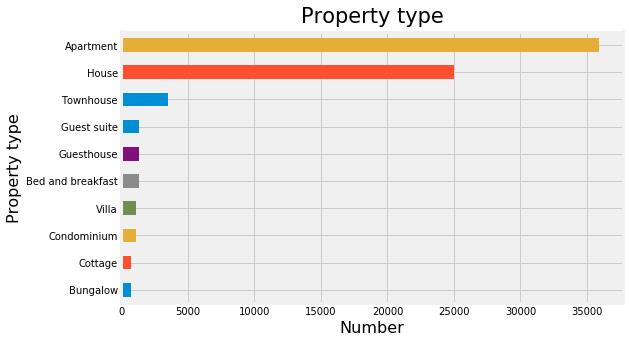

In [64]:
ax = df_listing3.property_type.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(8,5))

# set the title
ax.set_title("Property type", fontsize=21, y=1.01)


# x-axis labels
ax.set_ylabel('Property type', fontsize=16)

# y-axis labels
ax.set_xlabel('Number', fontsize=16)



# explore distribution of accommodates
print 'Number of property type'
print df_listing3.property_type.value_counts().head(10)



 We see that majority of hosts own Apartment and House in Australia.

## Review Scores rating

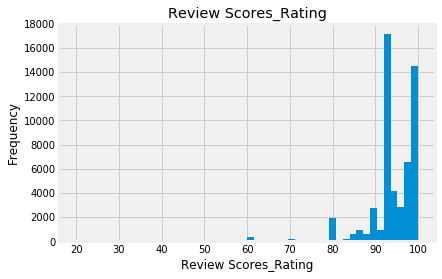

Review Scores_Ratings
93     15905
100    12238
97      3379
98      3206
96      2812
95      2461
99      2235
90      2103
80      1907
94      1666
92      1218
91       960
87       702
89       631
88       587
60       395
85       352
84       274
86       266
83       217
70       178
73       130
20       104
40       103
82        92
75        71
76        62
77        56
67        49
78        45
81        40
50        39
79        30
72        18
74        15
65        13
68        10
69         9
71         9
53         8
47         7
66         7
55         6
63         4
58         2
44         1
46         1
36         1
48         1
51         1
52         1
54         1
30         1
56         1
57         1
64         1
Name: review_scores_rating, dtype: int64


In [65]:
plt.hist(df_listing_final.review_scores_rating, bins=50)
plt.title("Review Scores_Rating")
plt.xlabel("Review Scores_Rating")
plt.ylabel("Frequency")
plt.show()

# explore distribution of accommodates
print 'Review Scores_Ratings'
print df_listing_final.review_scores_rating.value_counts()

We see a majority of listing achieved a scores rating from 90 to 100%. Let see whether superhosts achieved better rating than Non-superhosts.

## Superhosts vs Non-superhosts

In [66]:
# Split supersuperhost and Normal hosts
df_is_superhost = df_listing3[df_listing3['host_is_superhost']=='t']
df_not_superhost = df_listing3[df_listing3['host_is_superhost']=='f']

### Review Scores Rating

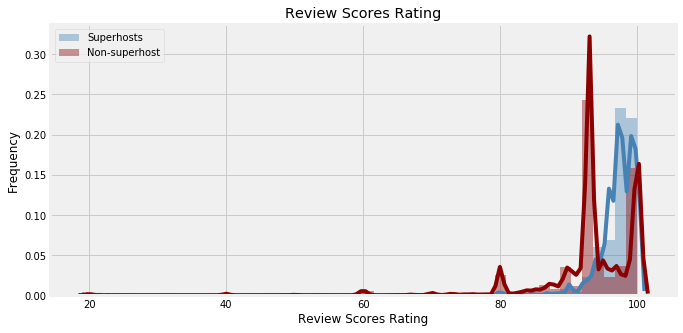

Superhost Overall Average Rating: 97.2490587895
Percentage of superhost with score over 95: 83.47%
------------------------------------

Non-superhost Overall Average Rating: 93.1955087357
Percentage of non-superhost with score over 95: 34.87%


In [192]:
# Create the `matplotlib` figure and get the axis.
# Initialize a `matplotlib` figure.
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

ax = sns.distplot(df_is_superhost.review_scores_rating, bins=50, color='steelblue', ax=ax)
ax = sns.distplot(df_not_superhost.review_scores_rating, bins=50, color='darkred', ax=ax)
plt.title("Review Scores Rating")
plt.xlabel("Review Scores Rating")
plt.ylabel("Frequency")
plt.legend(['Superhosts', 'Non-superhost'])
plt.show()

# explore distribution of overall score
print 'Superhost Overall Average Rating:', df_is_superhost.review_scores_rating.mean()
print 'Percentage of superhost with score over 95:', str(round(float((len(df_is_superhost[df_is_superhost.review_scores_rating>95]))/(float(len(df_is_superhost.review_scores_rating)))*100), 2))+"%"

print '------------------------------------\n'
print 'Non-superhost Overall Average Rating:', df_not_superhost.review_scores_rating.mean()
print 'Percentage of non-superhost with score over 95:', str(round(float((len(df_not_superhost[df_not_superhost.review_scores_rating>95]))/(float(len(df_not_superhost.review_scores_rating)))*100), 2))+"%"

From the distribution graph, we could see that over 83% of the superhosts achieved score more than 95 while only 35% of the non-superhosts achieved the same score.

### Review Scores Accuracy

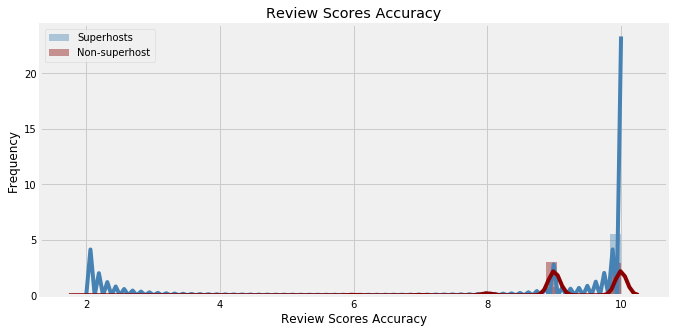

Superhost Overall Average Accuracy: 9.87177816392
Percentage of superhost with perfect score: 88.04%
------------------------------------

Non-superhost Overall Average Accuracy: 9.36134996048
Percentage of non-superhost with perfect score: 46.61%


In [193]:
# Create the `matplotlib` figure and get the axis.
# Initialize a `matplotlib` figure.
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

ax = sns.distplot(df_is_superhost.review_scores_accuracy, bins=50, color='steelblue', ax=ax)
ax = sns.distplot(df_not_superhost.review_scores_accuracy, bins=50, color='darkred', ax=ax)
plt.title("Review Scores Accuracy")
plt.xlabel("Review Scores Accuracy")
plt.ylabel("Frequency")
plt.legend(['Superhosts', 'Non-superhost'])
plt.show()


# explore distribution of Accuracy score
print 'Superhost Overall Average Accuracy:', df_is_superhost.review_scores_accuracy.mean()
print 'Percentage of superhost with perfect score:', str(round(float((len(df_is_superhost[df_is_superhost.review_scores_accuracy==10]))/(float(len(df_is_superhost.review_scores_accuracy)))*100), 2))+"%"

print '------------------------------------\n'
print 'Non-superhost Overall Average Accuracy:', df_not_superhost.review_scores_accuracy.mean()
print 'Percentage of non-superhost with perfect score:', str(round(float((len(df_not_superhost[df_not_superhost.review_scores_accuracy==10]))/(float(len(df_not_superhost.review_scores_accuracy)))*100), 2))+"%"


From here, we could see a majority of superhosts achieved the perfect score while less than 50% of non-superhosts achieve the perfect score.

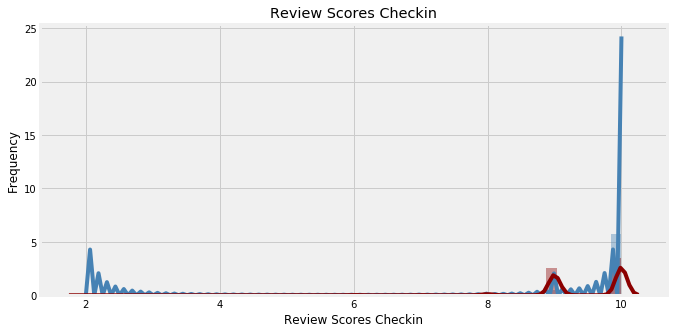

Superhost Checkin Average Rating: 9.90732696206
Percentage of superhost with perfect score: 91.55%
------------------------------------

Non-superhost Checkin Average Rating: 9.48798941714
Percentage of non-superhost with perfect score: 55.35%


In [202]:
# Create the `matplotlib` figure and get the axis.
# Initialize a `matplotlib` figure.
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

ax = sns.distplot(df_is_superhost.review_scores_checkin, bins=50, color='steelblue', ax=ax)
ax = sns.distplot(df_not_superhost.review_scores_checkin, bins=50, color='darkred', ax=ax)
plt.title("Review Scores Checkin")
plt.xlabel("Review Scores Checkin")
plt.ylabel("Frequency")
plt.show()

# explore distribution of checkin score
print 'Superhost Checkin Average Rating:', df_is_superhost.review_scores_checkin.mean()
print 'Percentage of superhost with perfect score:', str(round(float((len(df_is_superhost[df_is_superhost.review_scores_checkin==10]))/(float(len(df_is_superhost.review_scores_checkin)))*100), 2))+"%"

print '------------------------------------\n'
print 'Non-superhost Checkin Average Rating:', df_not_superhost.review_scores_checkin.mean()
print 'Percentage of non-superhost with perfect score:', str(round(float((len(df_not_superhost[df_not_superhost.review_scores_checkin==10]))/(float(len(df_not_superhost.review_scores_checkin)))*100), 2))+"%"

From here, we could see a majority of superhosts achieved the perfect score while 55% of non-superhosts achieve the perfect score.

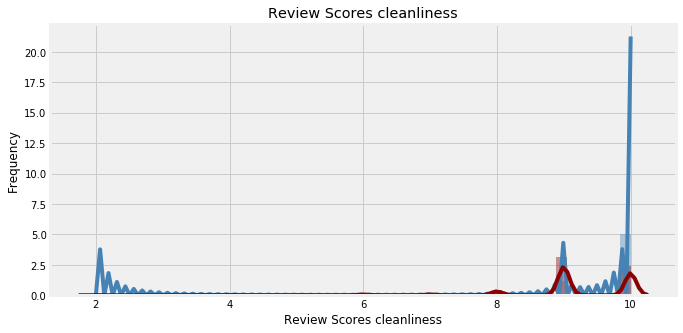

Superhost Cleanliness Average Rating: 9.78533159571
Percentage of superhost with perfect score: 80.26%
------------------------------------

Non-superhost Cleanliness Average Rating: 9.19708971236
Percentage of non-superhost with perfect score: 38.65%


In [206]:
# Create the `matplotlib` figure and get the axis.
# Initialize a `matplotlib` figure.
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

ax = sns.distplot(df_is_superhost.review_scores_cleanliness, bins=50, color='steelblue', ax=ax)
ax = sns.distplot(df_not_superhost.review_scores_cleanliness, bins=50, color='darkred', ax=ax)
plt.title("Review Scores cleanliness")
plt.xlabel("Review Scores cleanliness")
plt.ylabel("Frequency")
plt.show()

# explore distribution of Cleanliness score
print 'Superhost Cleanliness Average Rating:', df_is_superhost.review_scores_cleanliness.mean()
print 'Percentage of superhost with perfect score:', str(round(float((len(df_is_superhost[df_is_superhost.review_scores_cleanliness==10]))/(float(len(df_is_superhost.review_scores_cleanliness)))*100), 2))+"%"

print '------------------------------------\n'
print 'Non-superhost Cleanliness Average Rating:', df_not_superhost.review_scores_cleanliness.mean()
print 'Percentage of non-superhost with perfect score:', str(round(float((len(df_not_superhost[df_not_superhost.review_scores_cleanliness==10]))/(float(len(df_not_superhost.review_scores_cleanliness)))*100), 2))+"%"

From here, we could see more than 80% superhosts achieved the perfect score while less than 50% of non-superhosts achieve the perfect score.

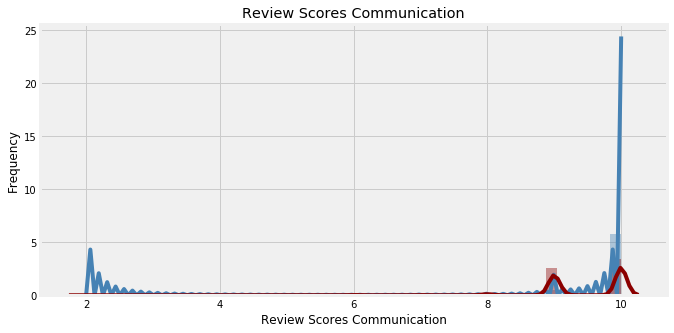

Superhost Communication Average Rating: 9.91529105126
Percentage of superhost with perfect score: 92.13%
------------------------------------

Non-superhost Communication Average Rating: 9.48592446803
Percentage of non-superhost with perfect score: 55.43%


In [204]:
# Create the `matplotlib` figure and get the axis.
# Initialize a `matplotlib` figure.
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

ax = sns.distplot(df_is_superhost.review_scores_communication, bins=50, color='steelblue', ax=ax)
ax = sns.distplot(df_not_superhost.review_scores_communication, bins=50, color='darkred', ax=ax)
plt.title("Review Scores Communication")
plt.xlabel("Review Scores Communication")
plt.ylabel("Frequency")
plt.show()

# explore distribution of Communication score
print 'Superhost Communication Average Rating:', df_is_superhost.review_scores_communication.mean()
print 'Percentage of superhost with perfect score:', str(round(float((len(df_is_superhost[df_is_superhost.review_scores_communication==10]))/(float(len(df_is_superhost.review_scores_communication)))*100), 2))+"%"

print '------------------------------------\n'
print 'Non-superhost Communication Average Rating:', df_not_superhost.review_scores_communication.mean()
print 'Percentage of non-superhost with perfect score:', str(round(float((len(df_not_superhost[df_not_superhost.review_scores_communication==10]))/(float(len(df_not_superhost.review_scores_communication)))*100), 2))+"%"

From here, we could see a majority of superhosts achieved the perfect score while 55% of non-superhosts achieve the perfect score.

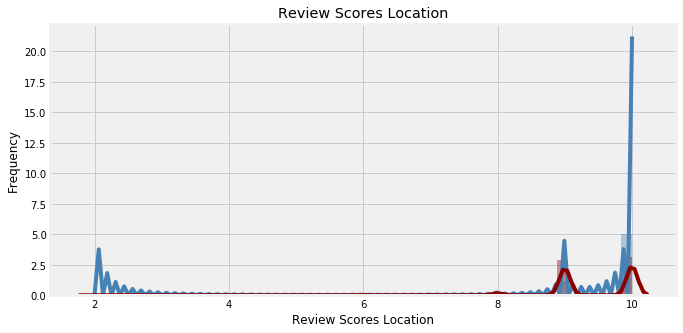

Superhost location Average Rating: 9.79163046626
Percentage of superhost with perfect score: 80.11%
------------------------------------

Non-superhost location Average Rating: 9.43091293336
Percentage of non-superhost with perfect score: 49.64%


In [208]:
# Create the `matplotlib` figure and get the axis.
# Initialize a `matplotlib` figure.
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

ax = sns.distplot(df_is_superhost.review_scores_location, bins=50, color='steelblue', ax=ax)
ax = sns.distplot(df_not_superhost.review_scores_location, bins=50, color='darkred', ax=ax)
plt.title("Review Scores Location")
plt.xlabel("Review Scores Location")
plt.ylabel("Frequency")
plt.show()

# explore distribution of location score
print 'Superhost location Average Rating:', df_is_superhost.review_scores_location.mean()
print 'Percentage of superhost with perfect score:', str(round(float((len(df_is_superhost[df_is_superhost.review_scores_location==10]))/(float(len(df_is_superhost.review_scores_location)))*100), 2))+"%"

print '------------------------------------\n'
print 'Non-superhost location Average Rating:', df_not_superhost.review_scores_location.mean()
print 'Percentage of non-superhost with perfect score:', str(round(float((len(df_not_superhost[df_not_superhost.review_scores_location==10]))/(float(len(df_not_superhost.review_scores_location)))*100), 2))+"%"

From here, we could see a majority of superhosts achieved the perfect score while less than 50% of non-superhosts achieve the perfect score.

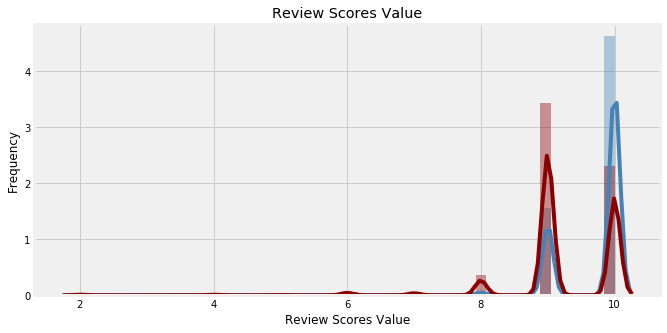

Superhost Average Value Rating: 9.72357370403
Percentage of superhost with perfect score: 73.82%
------------------------------------

Non-superhost Average Value Rating: 9.23280687886
Percentage of non-superhost with perfect score: 36.96%


In [209]:
# Create the `matplotlib` figure and get the axis.
# Initialize a `matplotlib` figure.
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

ax = sns.distplot(df_is_superhost.review_scores_value, bins=50, color='steelblue', ax=ax)
ax = sns.distplot(df_not_superhost.review_scores_value, bins=50, color='darkred', ax=ax)
plt.title("Review Scores Value")
plt.xlabel("Review Scores Value")
plt.ylabel("Frequency")
plt.show()

# explore distribution of value score
print 'Superhost Average Value Rating:', df_is_superhost.review_scores_value.mean()
print 'Percentage of superhost with perfect score:', str(round(float((len(df_is_superhost[df_is_superhost.review_scores_value==10]))/(float(len(df_is_superhost.review_scores_value)))*100), 2))+"%"

print '------------------------------------\n'
print 'Non-superhost Average Value Rating:', df_not_superhost.review_scores_value.mean()
print 'Percentage of non-superhost with perfect score:', str(round(float((len(df_not_superhost[df_not_superhost.review_scores_value==10]))/(float(len(df_not_superhost.review_scores_value)))*100), 2))+"%"

Compare to other sub-scores, the F

## Review per month

Corrlationship of Review per month and number_of_reviews
1.0


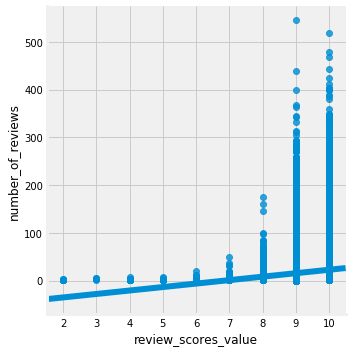

In [74]:
# plt.scatter(df_listing_final.review_scores_rating, df_listing_final.number_of_reviews)
sns.lmplot(x='review_scores_value', y='number_of_reviews', data=df_listing_final)

print 'Corrlationship of Review per month and number_of_reviews'
print df_listing_final['review_scores_value'].corr(df_listing_final['review_scores_value'])

## Pricing

In [75]:
df_listing4=df_listing3.drop(df_listing3[df_listing3['price'] > 200].index, axis=0)
df_listing4=df_listing4.reset_index(drop=True)

Average price of property type


property_type
Chalet                    144.493976
Dome house                143.333333
Resort                    141.000000
Cottage                   138.435203
Aparthotel                132.407407
Boutique hotel            131.219697
Serviced apartment        131.162447
Island                    129.750000
Nature lodge              125.303030
Heritage hotel (India)    125.000000
Name: price, dtype: float64

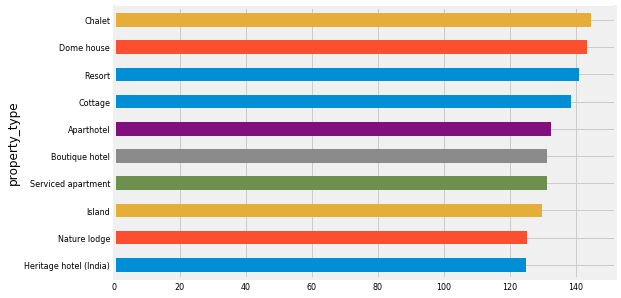

In [76]:
df_listing4.groupby('property_type')['price'].mean().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', 
            figsize=(8,5), 
            fontsize=8)
print 'Average price of property type'
df_listing4.groupby('property_type')['price'].mean().sort_values(ascending=False).head(10).sort_values(ascending=False)

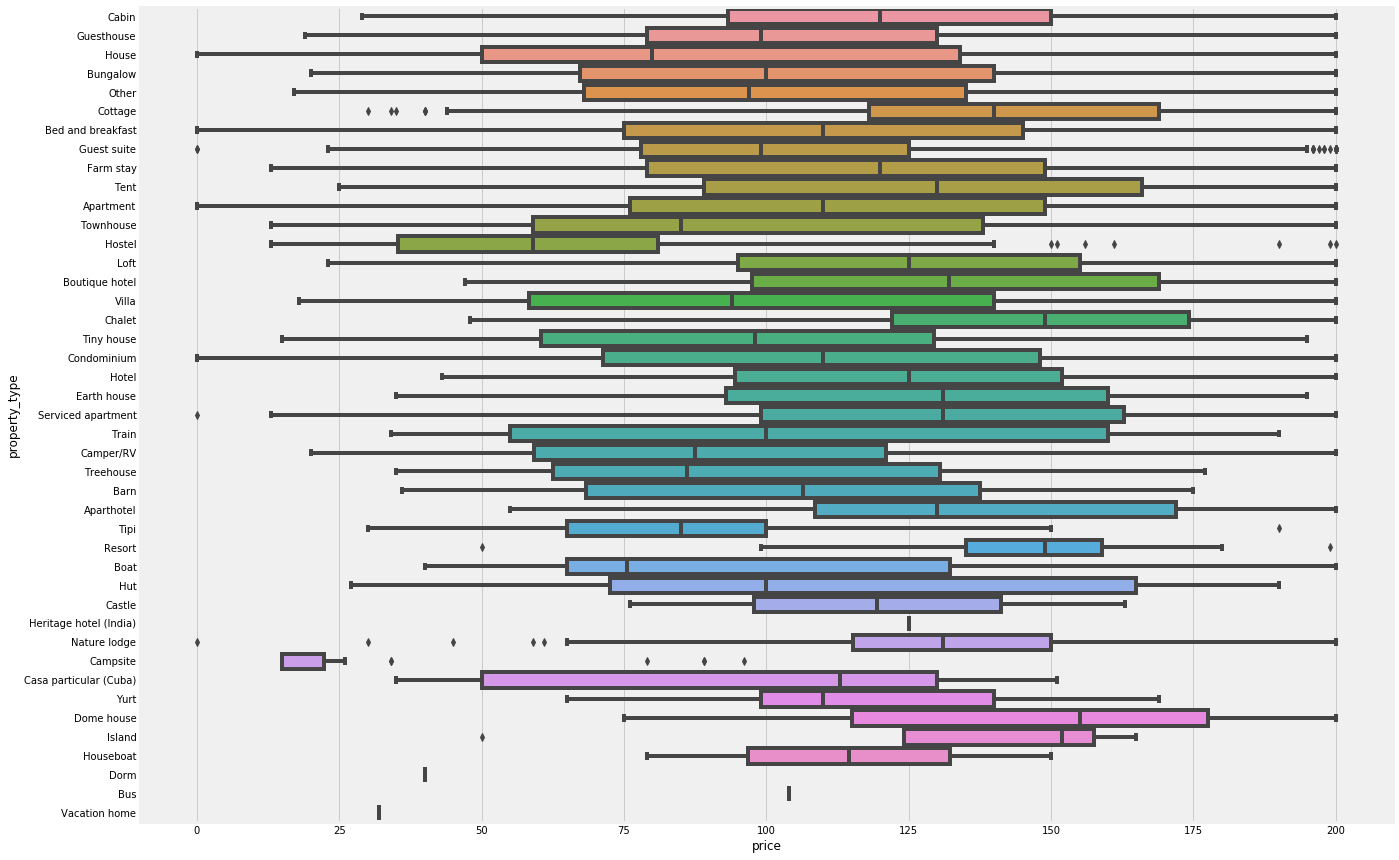

In [77]:
#Create a figure instance
fig = plt.figure(figsize=(20,15))

#Create an axes instance
ax = fig.gca()

sns.boxplot(x=df_listing4['price'], y=df_listing4['property_type'], ax= ax, orient="h")

## Correlationship

In [78]:
# Find most important features relative to target
print("Top 10 positive features relative to target")
corr_p = df_listing_final.corr(method='pearson')
corr_s = df_listing_final.corr(method='spearman')
corr_p.sort_values(["price"], ascending = False, inplace = True)
corr_s.sort_values(["price"], ascending = False, inplace = True)
# print(corr.price[1:11])
corr = pd.DataFrame([df_listing_final.columns, list(corr_p.price), list(corr_s.price)], 
                     index=['features', 'pearson', 'spearman']).T.sort_values('pearson', ascending=False)

corr[1:11]

Top 10 positive features relative to target


,features,pearson,spearman
1,host_response_rate,0.647435,0.667231
2,zipcode,0.50738,0.580282
3,latitude,0.428022,0.482312
4,longitude,0.35273,0.458255
5,accommodates,0.198586,0.199098
6,bathrooms,0.141767,0.162393
7,bedrooms,0.127302,0.158264
8,beds,0.123854,0.133725
9,price,0.0850071,0.123049
10,minimum_nights,0.0743118,0.10914


In [79]:
# Find top 10 negative features relative to target
print("Top negative 10 features relative to target")
corr.tail(10)

Top negative 10 features relative to target


,features,pearson,spearman
83,instant_bookable_t,-0.0382449,-0.0423754
84,cancellation_policy_flexible,-0.0486259,-0.0501147
85,cancellation_policy_moderate,-0.0656585,-0.0671296
86,cancellation_policy_strict_14_with_grace_period,-0.0682615,-0.072936
87,cancellation_policy_super_strict_30,-0.15563,-0.16947
88,cancellation_policy_super_strict_60,-0.17812,-0.183314
89,require_guest_profile_picture_f,-0.221203,-0.225087
90,require_guest_profile_picture_t,-0.600228,-0.618651
91,require_guest_phone_verification_f,NaN,NaN
92,require_guest_phone_verification_t,NaN,NaN


In [80]:
df_listing_final.head()

,host_response_time,host_response_rate,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,4,1.00,5371,-34.509717,138.816127,2,1,1,1,91.0,...,0,0,0,1,0,0,1,0,1,0
1,4,1.00,5118,-34.605631,138.648229,3,1,1,2,91.0,...,0,0,1,0,0,0,1,0,1,0
2,4,1.00,5355,-34.488111,138.924490,16,8,8,1,140.0,...,0,0,0,1,0,0,1,0,1,0
3,3,0.95,5353,-34.499428,139.044344,2,1,1,1,85.0,...,0,1,0,0,0,0,1,0,1,0
4,2,0.50,5355,-34.472304,139.009037,2,1,1,1,65.0,...,0,0,1,0,0,0,1,0,1,0


In [81]:
df_listing_final.shape

(54632, 93)

## Convert to CSV file

In [82]:
df_listing_final.to_csv('df_listing_final.csv', encoding='utf-8')

## Review dataset

In [83]:
df_listing_NLP=df_listing[['id', 'host_id', 'summary', 'description', 'neighborhood_overview', 'notes', 'house_rules', 'host_about', 'transit', 'host_is_superhost', 'access', 'amenities', 'interaction', 'space', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_rating']]

In [84]:
#read the review datasets
review_BR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Barossa/reviews.csv')
review_MB = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Melbourne/reviews.csv')
review_NR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/NorthernRivers/reviews.csv')
review_SN = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Sydney/reviews.csv')
review_TM = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Tasmania/reviews.csv')
review_WA = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/WesternAustralia/reviews.csv')

In [85]:
#see the shape of the review datasets
print(review_BR.shape)
print(review_MB.shape)
print(review_NR.shape)
print(review_SN.shape)
print(review_TM.shape)
print(review_WA.shape)

(4300, 6)
(418788, 6)
(97847, 6)
(393726, 6)
(163421, 6)
(197688, 6)


In [86]:
# conbining overall datasets
frames_review= [review_BR, review_MB, review_NR, review_SN, review_TM, review_WA]
df_review= pd.concat(frames_review)
df_review.reset_index()
# rename the columns for futher combination
rename= ['id', 'customers_id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
df_review.columns=rename
df_review.head()

,id,customers_id,date,reviewer_id,reviewer_name,comments
0,1125097,7269778,2013-09-13,3053083,Stephen,While I didnt have the pleasure of meeting Hea...
1,1125097,10081118,2014-01-29,1898281,Rus,Great host and amazing accommodation! \r\n\r\...
2,1125097,10335170,2014-02-14,2725224,Teresa,"A lovely and convenient location, surrounded b..."
3,1125097,10881952,2014-03-11,8982612,Kathy,A wonderful experience from start to finish . ...
4,1125097,11872081,2014-04-17,10977428,Phillip,The coach house is in a lovely location. We we...


In [87]:
# see the shape of review dataset
print df_review.shape

#Check the number of the unique values in the datasets
for items in df_review:
    print items, df_review[items].nunique()

(1275770, 6)
id 57283
customers_id 1275751
date 2708
reviewer_id 894408
reviewer_name 109794
comments 1233125


In [88]:
# Merge the final dataset with review dataset
df_listingwr=pd.merge(df_listing_NLP, df_review, on='id')
df_listingwr.shape

(1275770, 25)

In [89]:
# Check the number of the unique value for the dataset, df_listingwr
for items in df_listingwr:
    print items, df_listingwr[items].nunique()

id 57283
host_id 41196
summary 54686
description 56357
neighborhood_overview 34855
notes 26552
house_rules 34085
host_about 23289
transit 35691
host_is_superhost 2
access 35609
amenities 55596
interaction 32792
space 43048
review_scores_accuracy 9
review_scores_cleanliness 9
review_scores_checkin 9
review_scores_communication 9
review_scores_location 8
review_scores_rating 57
customers_id 1275751
date 2708
reviewer_id 894408
reviewer_name 109794
comments 1233125


In [90]:
# Check the number of null of the datasets 
df_listingwr.isna().sum()[df_listingwr.isna().sum()>0]

summary                         20107
description                       161
neighborhood_overview          250127
notes                          401374
house_rules                    231502
host_about                     320583
transit                        223803
host_is_superhost                1356
access                         205883
interaction                    233396
space                          127263
review_scores_accuracy           2094
review_scores_cleanliness        2056
review_scores_checkin            2160
review_scores_communication      2072
review_scores_location           2166
review_scores_rating             1999
reviewer_name                       1
comments                          909
dtype: int64

In [91]:
#fill the na with 'None'
df_listingwr.fillna('None', inplace=True)

In [92]:
df_listingwr.to_csv('df_listingwr.csv', encoding='utf-8')